## Load Dataset

In [1]:
import pandas as pd

dataset = pd.read_csv("Climate_Sby_2013-2021.csv")

dataset.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2013,24.0,34.3,27.6,85.0,42.2,2.0,11.0,280.0,3.0,W
1,02-01-2013,24.0,32.6,27.7,86.0,99.1,5.0,12.0,280.0,4.0,W
2,03-01-2013,26.0,32.9,28.2,83.0,68.0,0.1,9.0,280.0,3.0,W
3,04-01-2013,25.0,32.8,28.1,82.0,0.0,2.3,8.0,270.0,4.0,W
4,05-01-2013,25.0,30.0,27.3,86.0,11.6,0.0,9.0,240.0,3.0,W


In [2]:
ds = dataset[['Tanggal', 'Tn', 'Tx', 'Tavg', 'RH_avg']]

ds.head()

,Tanggal,Tn,Tx,Tavg,RH_avg
0,01-01-2013,24.0,34.3,27.6,85.0
1,02-01-2013,24.0,32.6,27.7,86.0
2,03-01-2013,26.0,32.9,28.2,83.0
3,04-01-2013,25.0,32.8,28.1,82.0
4,05-01-2013,25.0,30.0,27.3,86.0


In [4]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tn,3055.0,25.088576,1.249745,20.2,24.2,25.1,26.0,28.6
Tx,3054.0,33.638474,1.436136,24.6,32.8,33.6,34.4,37.6
Tavg,3059.0,28.667473,1.192726,25.1,27.8,28.6,29.5,32.8
RH_avg,3059.0,74.965021,7.433051,51.0,70.0,76.0,81.0,94.0


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  3078 non-null   object 
 1   Tn       3055 non-null   float64
 2   Tx       3054 non-null   float64
 3   Tavg     3059 non-null   float64
 4   RH_avg   3059 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.4+ KB


## Load Dataset, Parse Date and Handle Missing Values

In [6]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')

df = pd.read_csv('Climate_Sby_2013-2021.csv', header=0, parse_dates=[0], date_parser=dateparse)

df = df.fillna(method ='pad')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  3078 non-null   datetime64[ns]
 1   Tn       3078 non-null   float64       
 2   Tx       3078 non-null   float64       
 3   Tavg     3078 non-null   float64       
 4   RH_avg   3078 non-null   float64       
 5   RR       3078 non-null   float64       
 6   ss       3078 non-null   float64       
 7   ff_x     3078 non-null   float64       
 8   ddd_x    3078 non-null   float64       
 9   ff_avg   3078 non-null   float64       
 10  ddd_car  3078 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 264.6+ KB


/home/aifajar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


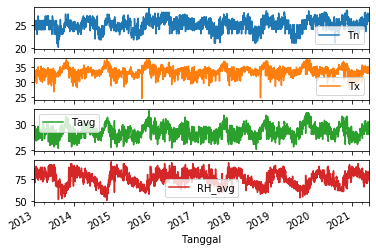

In [20]:
plot_cols = ['Tn', 'Tx', 'Tavg', 'RH_avg']
plot_features = df[plot_cols]
plot_features.index = df['Tanggal']
_ = plot_features.plot(subplots=True)

In [7]:
df['Tanggal'].dtype

dtype('<M8[ns]')

In [8]:
df.head(15)

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2013-01-01,24.0,34.3,27.6,85.0,42.2,2.0,11.0,280.0,3.0,W
1,2013-01-02,24.0,32.6,27.7,86.0,99.1,5.0,12.0,280.0,4.0,W
2,2013-01-03,26.0,32.9,28.2,83.0,68.0,0.1,9.0,280.0,3.0,W
3,2013-01-04,25.0,32.8,28.1,82.0,0.0,2.3,8.0,270.0,4.0,W
4,2013-01-05,25.0,30.0,27.3,86.0,11.6,0.0,9.0,240.0,3.0,W
5,2013-01-06,25.0,33.0,27.9,81.0,1.5,2.4,10.0,290.0,3.0,W
6,2013-01-07,25.0,32.6,28.1,82.0,20.4,0.0,8.0,260.0,4.0,W
7,2013-01-08,26.0,33.1,28.7,75.0,0.0,5.2,9.0,260.0,4.0,W
8,2013-01-09,26.0,31.4,28.1,77.0,0.8,0.4,10.0,270.0,5.0,W
9,2013-01-10,26.0,33.9,29.7,71.0,0.0,8.0,12.0,270.0,6.0,W


In [9]:
df_Tn = df[['Tanggal', 'Tn']]

df_Tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  3078 non-null   datetime64[ns]
 1   Tn       3078 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 48.2 KB


In [10]:
df_Tn.head()

,Tanggal,Tn
0,2013-01-01,24.0
1,2013-01-02,24.0
2,2013-01-03,26.0
3,2013-01-04,25.0
4,2013-01-05,25.0


In [11]:
df_Tn['Tanggal'].dtype

dtype('<M8[ns]')

In [12]:
df_Tn.to_csv('df_Tn.csv', index=False)

### Checking clean dataset

In [13]:
ds_Tn = pd.read_csv("df_Tn.csv")

ds_Tn.head()

,Tanggal,Tn
0,2013-01-01,24.0
1,2013-01-02,24.0
2,2013-01-03,26.0
3,2013-01-04,25.0
4,2013-01-05,25.0


## Create another clean datasets

In [14]:
df_Tx = df[['Tanggal', 'Tx']]
df_Tavg = df[['Tanggal', 'Tavg']]
df_RHavg = df[['Tanggal', 'RH_avg']]

df_Tx.head()

,Tanggal,Tx
0,2013-01-01,34.3
1,2013-01-02,32.6
2,2013-01-03,32.9
3,2013-01-04,32.8
4,2013-01-05,30.0


In [15]:
df_Tx.to_csv('df_Tx.csv', index=False)

In [16]:
df_Tavg.to_csv('df_Avg.csv', index=False)

In [17]:
df_RHavg.to_csv('df_RHavg.csv', index=False)

In [19]:
df_RHavg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  3078 non-null   datetime64[ns]
 1   RH_avg   3078 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 48.2 KB
